In [1]:
import pandas as pd
import seaborn as sns
import os
import utils
import matplotlib.pyplot as plt
import seaborn.objects as so
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv(os.path.join('data','cleaned_responses.csv'))
if not os.path.exists('figures'):
    os.makedirs('figures') #for outputs

data = data.loc[data['Science_Cat'] == 'Physical Sciences'] # filter for Physical Sciences only    

## What image analysis tools have you used before?

In [3]:
col = 'What image analysis tools have you used before? (check all that apply).1'

In [4]:
df_grouped = utils.make_counts_per_multiselect_group(data.dropna(subset=[col]),
                                         single_select_col= 'Single_Role',
                                         multi_select_col= col)

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


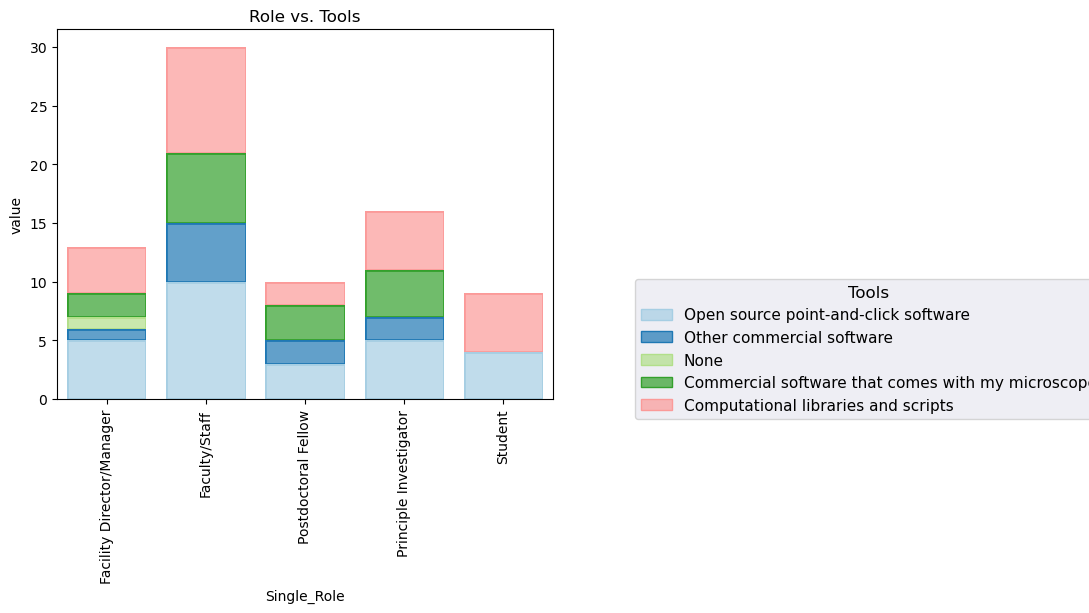

In [5]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Tools',
                           plottitle = 'Role vs. Tools',
                           plot_filename=os.path.join('figures','Role_vs_Tools_PS_byRole.png')
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


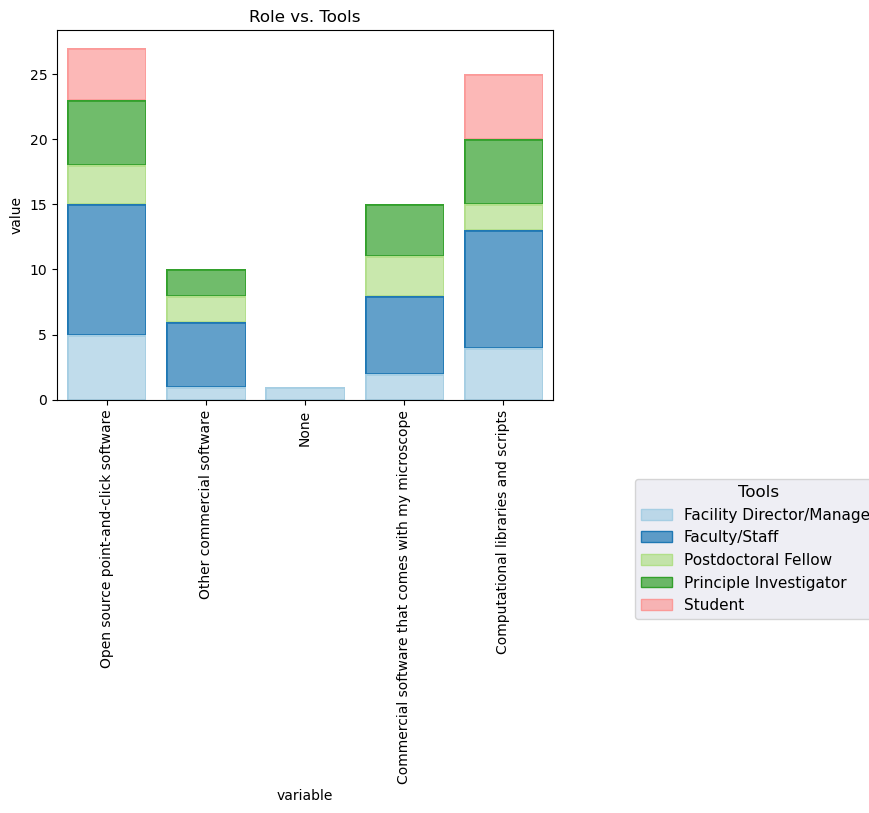

In [6]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Tools',
                           plottitle = 'Role vs. Tools',
                           plot_filename=os.path.join('figures','Role_vs_Tools_PS_byTool.png'),
                           groupbyfirstcol=False
                           )

## What image analysis tools do you use the most?

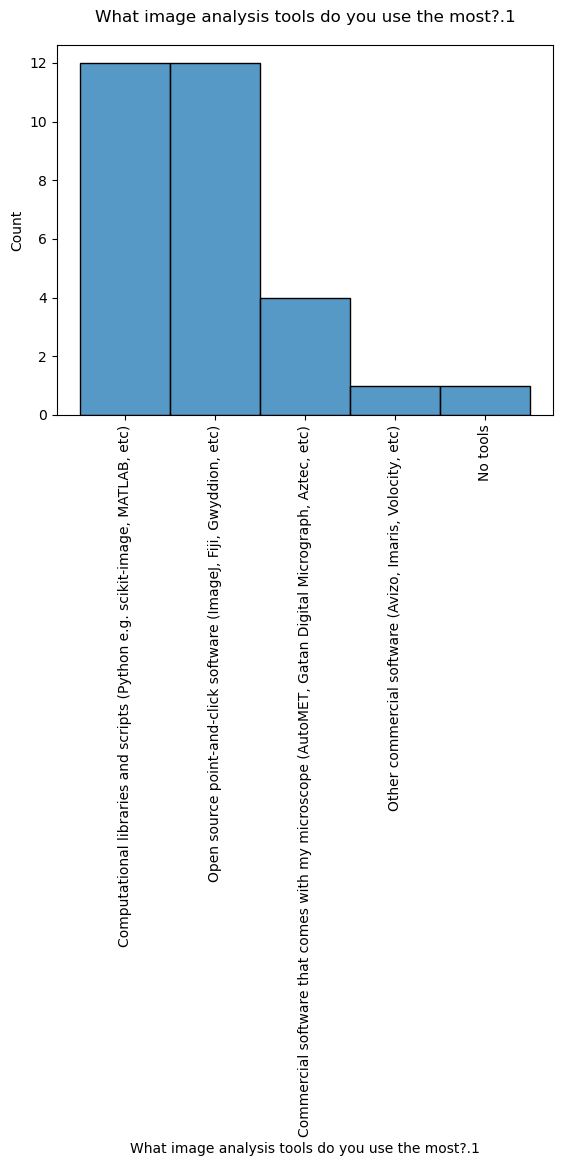

In [7]:
col = 'What image analysis tools do you use the most?.1'
utils.single_select(data, plot_filename=os.path.join('figures','IA_tools_PS.png'),
                    type='histogram',
                column=col,
                hue=None, rotate_x=True,)

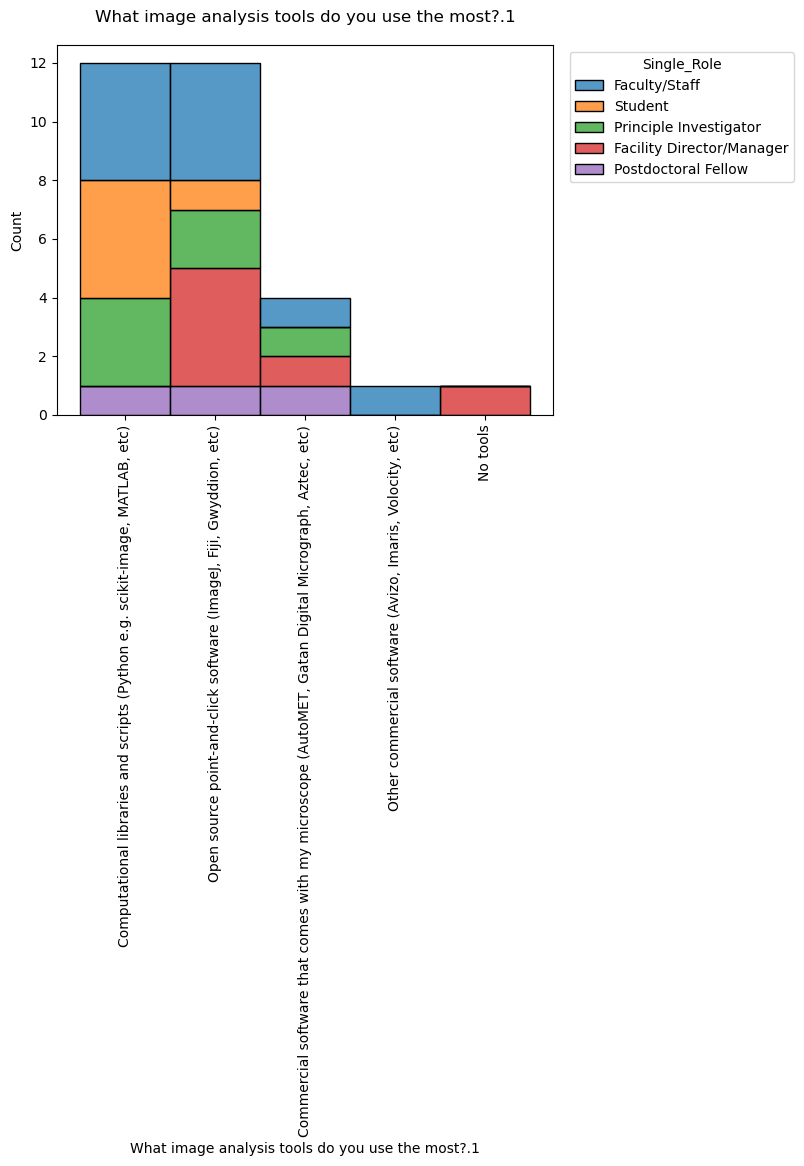

In [8]:
col = 'What image analysis tools do you use the most?.1'
utils.single_select(data, plot_filename=os.path.join('figures','IA_tools_PS.png'),
                    type='histogram',
                column=col,
                hue='Single_Role', rotate_x=True,
                multiple="stack")

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


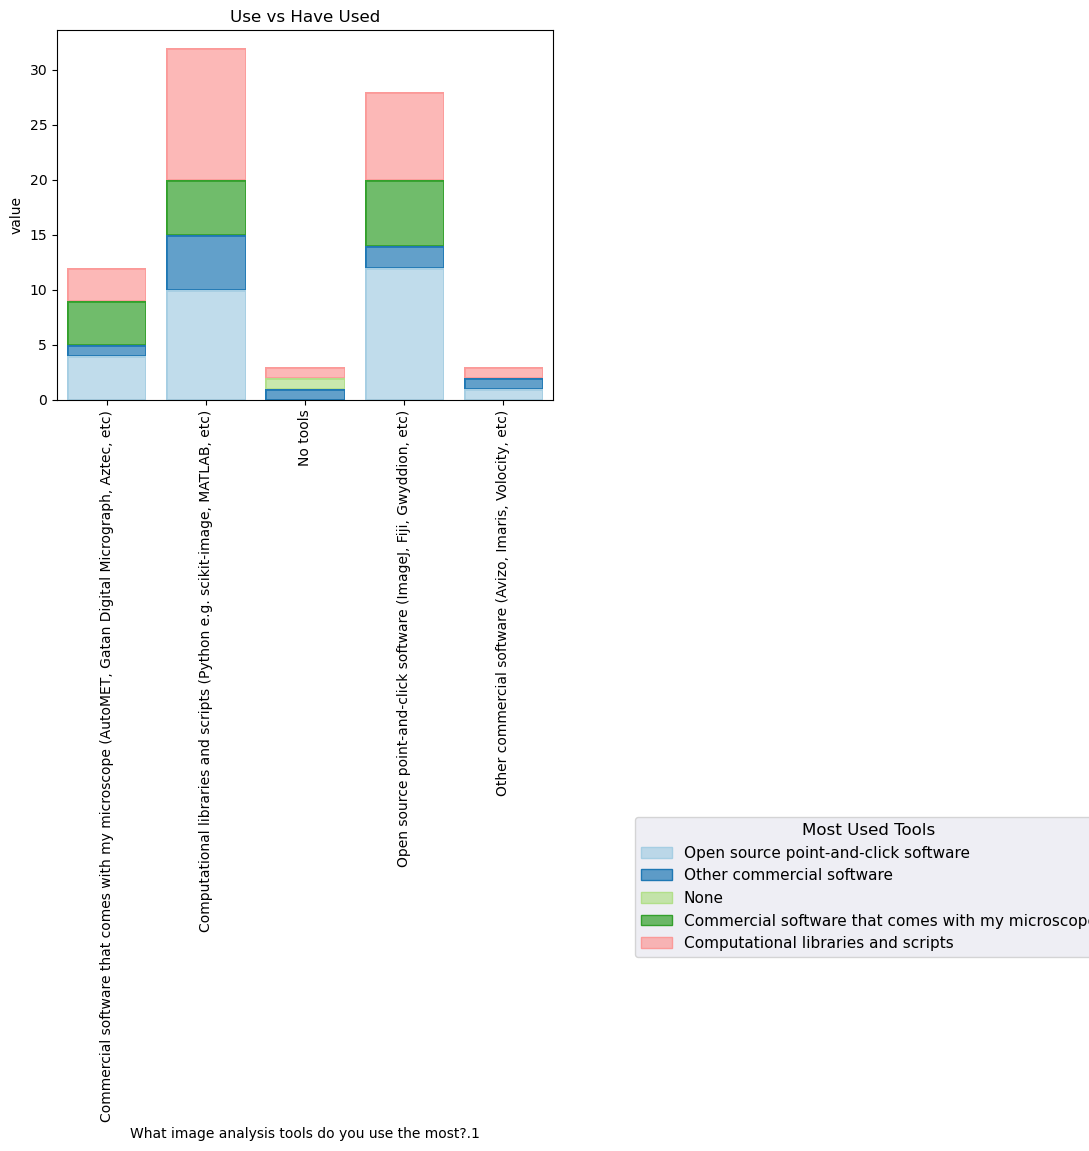

In [9]:
df_grouped = utils.make_counts_per_multiselect_group(data,
                                         single_select_col= 'What image analysis tools do you use the most?.1',
                                         multi_select_col= 'What image analysis tools have you used before? (check all that apply).1')
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Most Used Tools',
                           plottitle = 'Use vs Have Used',
                           plot_filename=os.path.join('figures','Tools_Use_vs_Have_Used_PS_byHaveUsed.png')
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


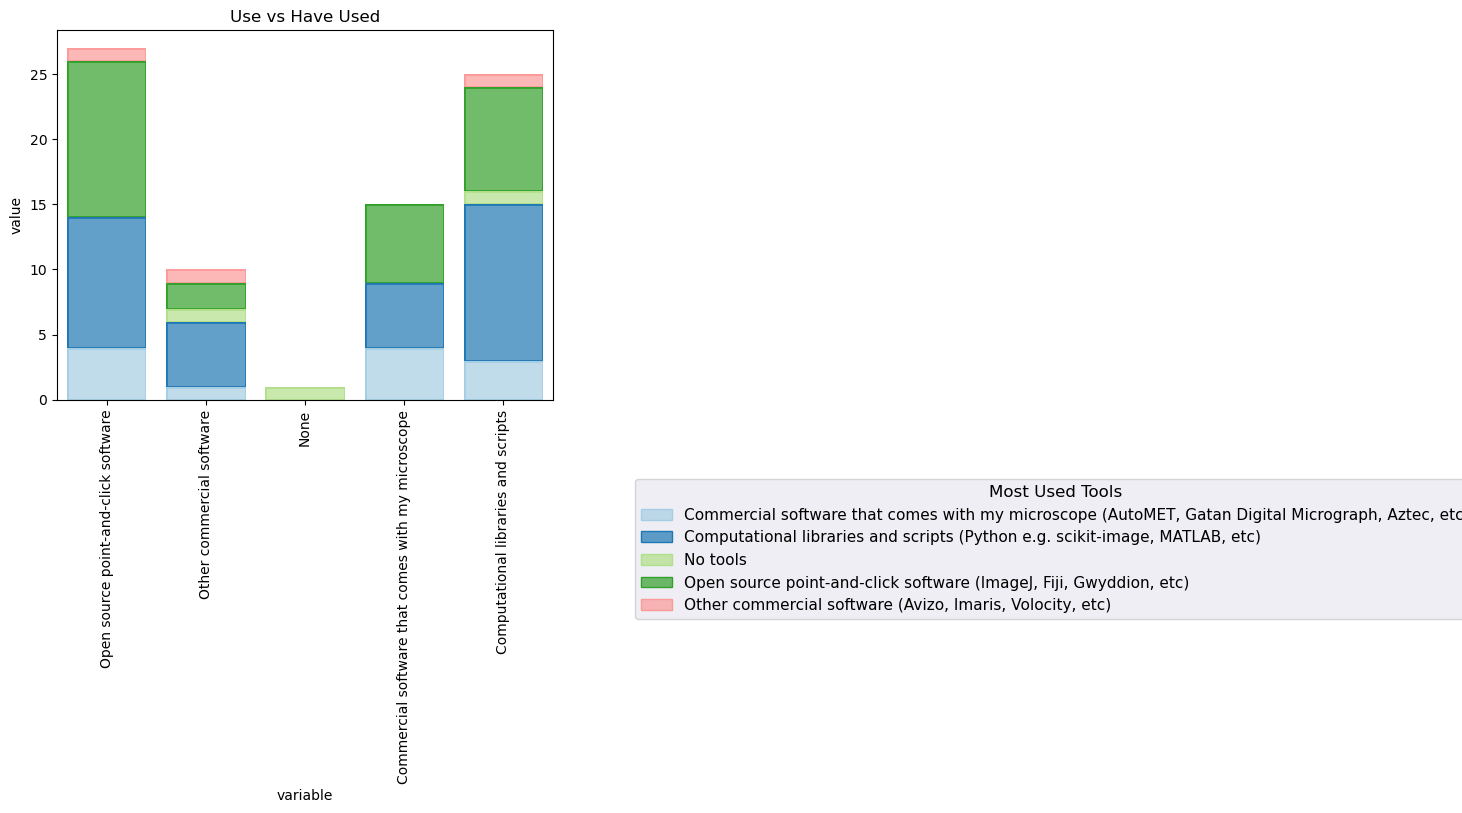

In [10]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Most Used Tools',
                           plottitle = 'Use vs Have Used',
                           plot_filename=os.path.join('figures','Use_vs_Have_Used_byMostUsed.png'),
                           groupbyfirstcol=False)

## What makes you select Open Source tools?

In [11]:
df = data[[x for x in data.columns if 'Gwyddion' in x]]
# make the columns look nicer
df.columns = [x.replace('If/when you use open source point-and-click software tools (e.g. ImageJ, Fiji, Gwyddion or others), what makes you use these tools rather than commercial software or computational libraries and scripts? ','') for x in df.columns]
df.columns = [x.replace('[','').replace(']','') for x in df.columns]

df = utils.df_for_percentage_stackedcharts(df)
df

,index,Very important,Moderately important,Somewhat important,Not at all important,I do not use these tools
0,Cost,53.6,32.1,10.7,3.6,3.6
1,Ease of use,53.6,21.4,21.4,7.1,3.6
2,Ease of access,67.9,25.0,3.6,7.1,3.6
3,Flexibility,57.1,25.0,21.4,NaN,3.6
4,Availability of tutorials,39.3,35.7,28.6,NaN,3.6
5,The ability to perform analyses without prior ...,32.1,28.6,14.3,21.4,10.7
6,Reproducibility/transparency about how analysi...,42.9,35.7,14.3,10.7,3.6


/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


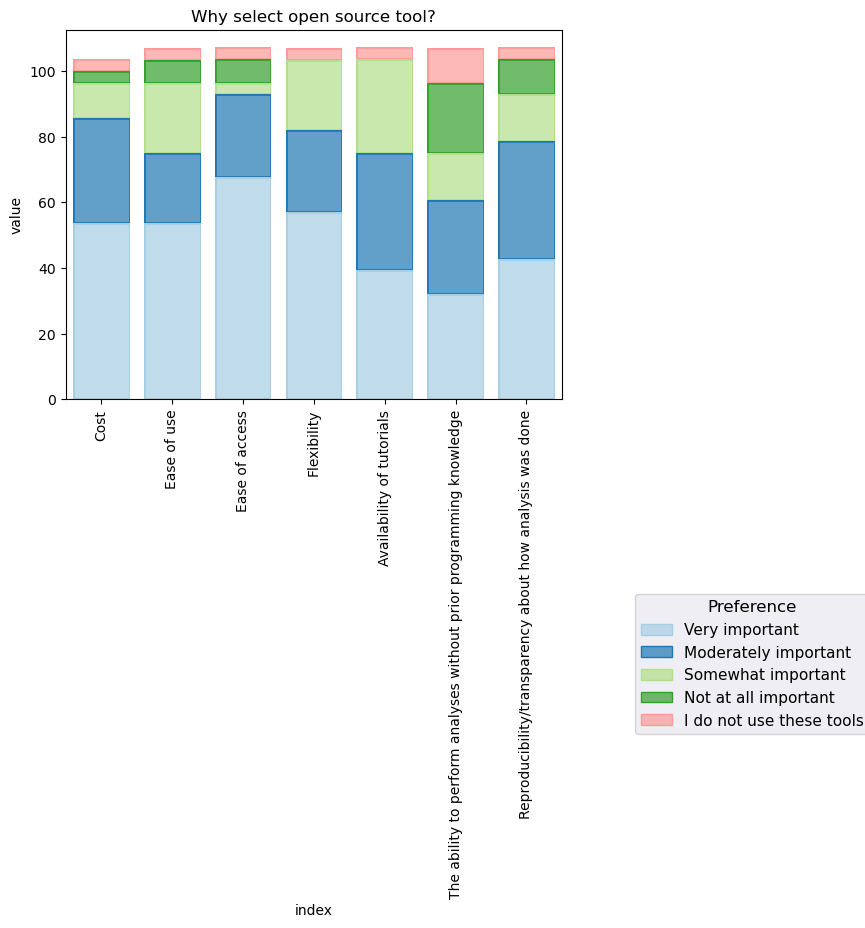

In [12]:
utils.plot_single_vs_multi(df,
                        'Preference',
                        os.path.join('figures', 'Why_select_open_source_tool_PS.png'),
                        "Why select open source tool?",
                        groupbyfirstcol=True)

## What kinds of images?

In [13]:
df = data[[x for x in data.columns if 'What kinds of images' in x]]
df=df.iloc[:,11:] # same naming was used for Physical Sciences and Life Sciences, so we only take the first 10 columns
# make the columns look nicer
df.columns = [x.replace('What kinds of images do you commonly want to analyze (select all that apply? ','') for x in df.columns]
df.columns = [x.replace('[','').replace(']','') for x in df.columns]
df

,Optical microscopy/DIC/fractography,Scanning electron microscopy (secondary electron or back scattered imaging),"Transmission electron microscopy (including electron diffraction and STEM imaging, e.g. HAADF-STEM)","Spectroscopy/diffractive imaging in the SEM/TEM (eg. EDS, EBSD, EELS, CL)",Imaging with mass spectrometry (eg SIMS/APT),X-ray microscopy (including tomography),"Scanning probe microscopy (AFM, STM and related techniques)",Fluorescence microscopy,Other.1
29,"2D, 2D + time, 3D (<3000x3000x100), 3D + time,...",2D,2D,2D,2D,"3D (<3000x3000x100), 3D + time",2D,"3D (<3000x3000x100), 3D + time",NaN
32,2D,2D,2D,2D,2D,NaN,2D,2D,NaN
39,3D large volume + time,3D large volume + time,3D large volume + time,3D large volume + time,3D large volume + time,3D large volume + time,3D large volume + time,3D large volume + time,NaN
113,2D + time,NaN,NaN,NaN,NaN,NaN,NaN,"2D + time, 3D large volume + time",NaN
130,"2D, 2D + time",2D,2D,2D,NaN,2D,2D,2D,NaN
137,NaN,2D,2D,2D,NaN,NaN,2D,NaN,NaN
157,NaN,2D,"2D, 2D + time, 3D (<3000x3000x100)","2D, 3D (<3000x3000x100)",NaN,NaN,"2D, 3D (<3000x3000x100)",NaN,NaN
158,NaN,2D,"2D, 2D + time","2D, 2D + time",NaN,NaN,NaN,NaN,NaN
164,2D,2D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,2D,NaN,2D,NaN,NaN,NaN,NaN,NaN


In [14]:
df_grouped = utils.make_counts_per_multiselect_group(df)

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/plot.py:1406: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[13 2 2 4 3 6 18 1 1 2 4 3 17 1 2 2 4 5 18 1 1 2 4 6 4 1 1 2 1 2 4 2 3 3 4
 1 11 2 1 2 3 4 8 2 3 5 3 4 4 4 3 3 2 2]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_series.loc[idx] = view_scale(layer_df.loc[idx, var])
/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (9), which may not be intended.
  warnings.warn(message, UserWarning)


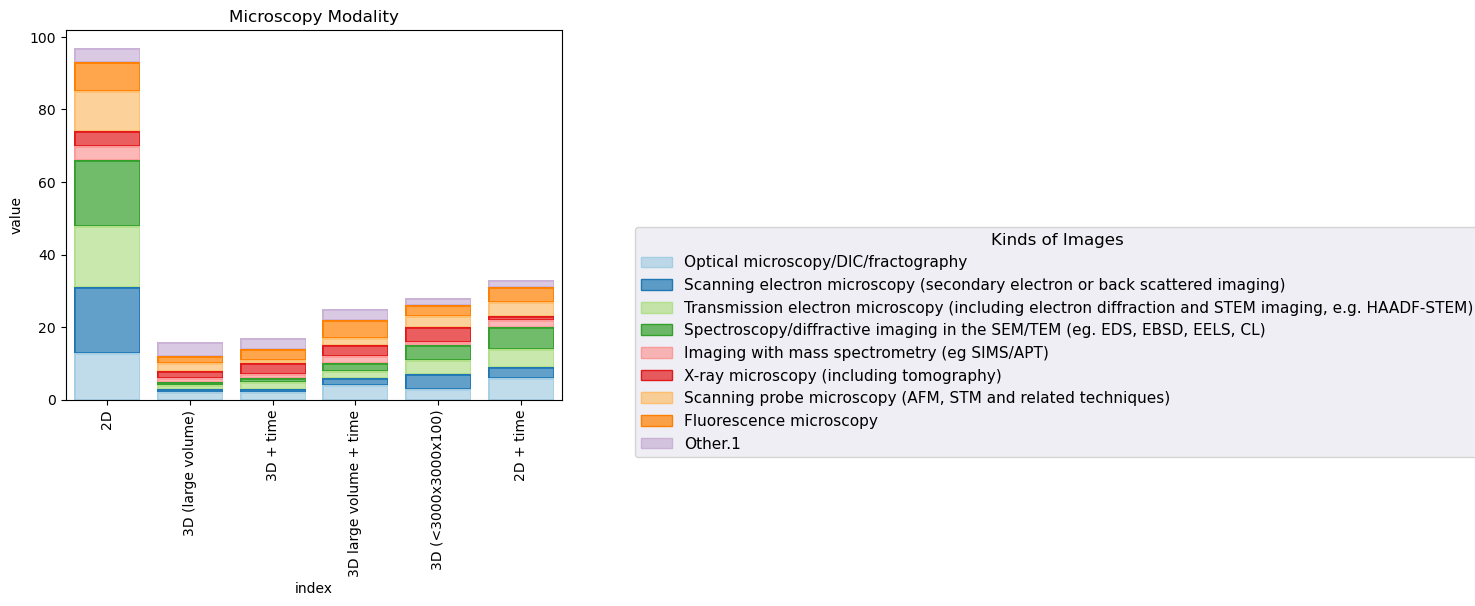

In [15]:
utils.plot_single_vs_multi(df_grouped,
                        'Kinds of Images',
                        os.path.join('figures', 'What_kinds_of_images_PS.png'),
                        'Microscopy Modality',
                        groupbyfirstcol=True)

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/plot.py:1406: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[13 2 2 4 3 6 18 1 1 2 4 3 17 1 2 2 4 5 18 1 1 2 4 6 4 1 1 2 1 2 4 2 3 3 4
 1 11 2 1 2 3 4 8 2 3 5 3 4 4 4 3 3 2 2]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_series.loc[idx] = view_scale(layer_df.loc[idx, var])
/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (6), which may not be intended.
  warnings.warn(message, UserWarning)


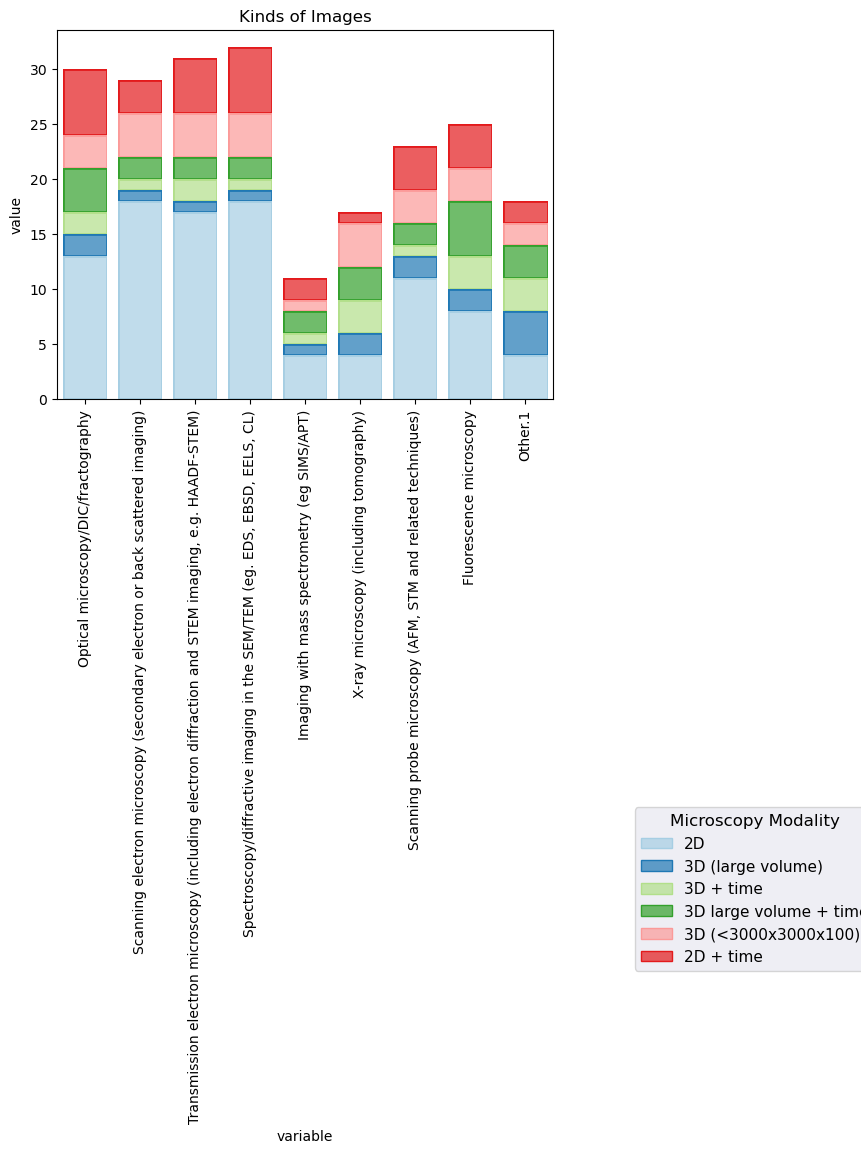

In [16]:
utils.plot_single_vs_multi(df_grouped,
                        'Microscopy Modality',
                        os.path.join('figures', 'What_kinds_of_modalities_PS.png'),
                        'Kinds of Images',
                        groupbyfirstcol=False)

## What image analysis problems? (free text)

In [17]:
[x for x in data.columns if "What image" in x]

['What image analysis tools have you used before? (check all that apply)',
 'What image analysis tools do you use the most?',
 'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you think are generally well-solved?',
 'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you wish had easier/better solutions?',
 'What image analysis tools have you used before? (check all that apply).1',
 'What image analysis tools do you use the most?.1',
 'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you think are generally well-solved?',
 'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you wish had easier/better solutions?']

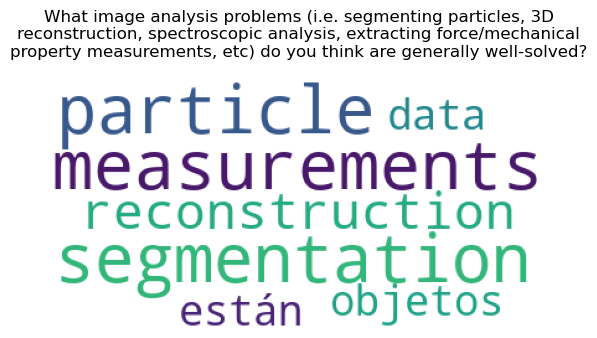

In [18]:
col = 'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you think are generally well-solved?'
utils.wordcloud_func(col,['como'],os.path.join('figures','what_problems_solved_PS.png'),data)

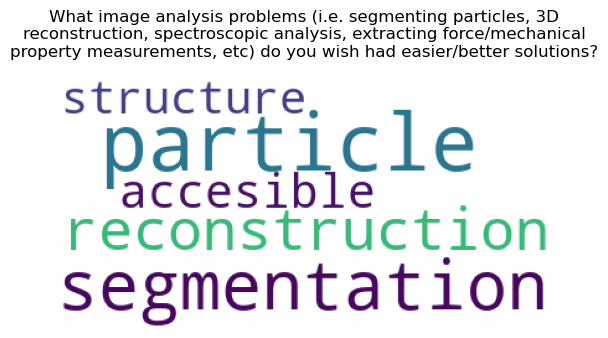

In [19]:
col = 'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you wish had easier/better solutions?'
utils.wordcloud_func(col,['análisis','imágenes','problemas'],os.path.join('figures','what_problems_unsolved_PS.png'),data)

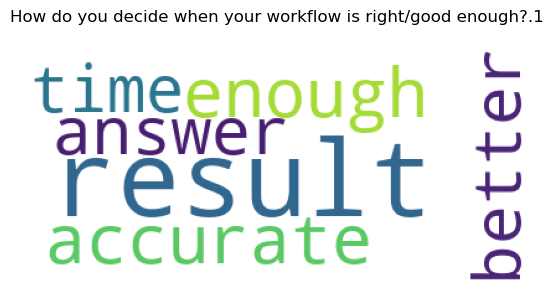

In [20]:
col = 'How do you decide when your workflow is right/good enough?.1'
utils.wordcloud_func(col,[],os.path.join('figures','good_enough_workflow_PS.png'),data)